In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import zscore,norm,randint
import warnings
import warnings; warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("flight_data.csv")
df.head()

,airlines,Date,Month,Year,Weekday,Dep_Time,Ar_Time,depr_Citie,Ar_Citie,Travel_Time,Airline_Cabin,no_stops,Price,timestamp,avg_Price,min_Price
0,IndiGo,1,1,2022,5,05:15,07:50,jaipur,Bengaluru,2h 35m,E,direct,7203,20211230-1158,7911.4,6203
1,IndiGo,1,1,2022,5,22:20,01:00,jaipur,Bengaluru,2h 40m,E,direct,7679,20211230-1158,7911.4,6203
2,IndiGo,1,1,2022,5,04:50,10:35,jaipur,Bengaluru,5h 45m,E,1 stop,7688,20211230-1158,7911.4,6203
3,IndiGo,1,1,2022,5,14:15,20:35,jaipur,Bengaluru,6h 20m,E,1 stop,7736,20211230-1158,7911.4,6203
4,IndiGo,1,1,2022,5,14:10,20:55,jaipur,Bengaluru,6h 45m,E,1 stop,7946,20211230-1158,7911.4,6203


In [3]:
df.shape

(12497, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12497 entries, 0 to 12496
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   airlines       12497 non-null  object 
 1   Date           12497 non-null  int64  
 2   Month          12497 non-null  int64  
 3   Year           12497 non-null  int64  
 4   Weekday        12497 non-null  int64  
 5   Dep_Time       12497 non-null  object 
 6   Ar_Time        12497 non-null  object 
 7   depr_Citie     12497 non-null  object 
 8   Ar_Citie       12497 non-null  object 
 9   Travel_Time    12497 non-null  object 
 10  Airline_Cabin  12497 non-null  object 
 11  no_stops       12497 non-null  object 
 12  Price          12497 non-null  int64  
 13  timestamp      12497 non-null  object 
 14  avg_Price      12497 non-null  float64
 15  min_Price      12497 non-null  int64  
dtypes: float64(1), int64(6), object(9)
memory usage: 1.5+ MB


In [5]:
## Statical description
df.describe(include="all")

,airlines,Date,Month,Year,Weekday,Dep_Time,Ar_Time,depr_Citie,Ar_Citie,Travel_Time,Airline_Cabin,no_stops,Price,timestamp,avg_Price,min_Price
count,12497,12497.000000,12497.000000,12497.0,12497.000000,12497,12497,12497,12497,12497,12497,12497,12497.000000,12497,12497.000000,12497.000000
unique,28,NaN,NaN,NaN,NaN,122,207,2,5,247,1,5,NaN,793,NaN,NaN
top,IndiGo,NaN,NaN,NaN,NaN,14:15,21:35,jaipur,mumbai,1h 00m,E,1 stop,NaN,20211229-2155,NaN,NaN
freq,5858,NaN,NaN,NaN,NaN,674,304,10034,2697,711,12497,7341,NaN,30,NaN,NaN
mean,NaN,15.668000,3.511163,2022.0,2.995359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6466.638073,NaN,6466.638073,2791.932704
std,NaN,8.698884,1.704824,0.0,2.025481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24429.783448,NaN,5821.276907,1032.310513
min,NaN,1.000000,1.000000,2022.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,452.000000,NaN,2012.600000,452.000000
25%,NaN,8.000000,2.000000,2022.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2332.000000,NaN,2961.866667,1939.000000
50%,NaN,16.000000,3.000000,2022.0,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2965.000000,NaN,5807.733333,2668.000000
75%,NaN,23.000000,5.000000,2022.0,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4006.000000,NaN,8111.266667,3238.000000


In [6]:
# Check missing values in the dataframe
df.isnull().sum()

airlines         0
Date             0
Month            0
Year             0
Weekday          0
Dep_Time         0
Ar_Time          0
depr_Citie       0
Ar_Citie         0
Travel_Time      0
Airline_Cabin    0
no_stops         0
Price            0
timestamp        0
avg_Price        0
min_Price        0
dtype: int64

In [7]:
df["Weekday"].value_counts()

6    1883
0    1875
4    1802
2    1790
1    1755
5    1708
3    1684
Name: Weekday, dtype: int64

In [8]:
df["Month"].value_counts()

3    2205
5    2141
1    2079
6    2079
4    2010
2    1983
Name: Month, dtype: int64

In [9]:
df["Year"].value_counts()

2022    12497
Name: Year, dtype: int64

In [10]:
df["airlines"].value_counts()

IndiGo                        5858
Air India                     2389
GoFirst                       2189
AirAsia India                 1201
SpiceJet                       724
Train                           20
Vistara, Air India              19
IndiGo, Vistara                 16
Vistara, IndiGo                 11
Vistara, AirAsia India          11
AirAsia India, SpiceJet         10
SpiceJet, IndiGo                10
SpiceJet, Vistara                8
AirAsia India, Vistara           6
GoFirst, SpiceJet                4
GoFirst, Air India               4
SpiceJet, Alaska Seaplanes       3
SpiceJet, GoFirst                2
IndiGo, AirAsia India            2
IndiGo, SpiceJet                 2
AirAsia India, IndiGo            1
Air India, SpiceJet              1
Multiple Airlines                1
SpiceJet, Air India              1
GoFirst, IndiGo                  1
IndiGo, GoFirst                  1
AirAsia India, GoFirst           1
Vistara, SpiceJet                1
Name: airlines, dtyp

In [11]:
df["Weekday"].value_counts()

6    1883
0    1875
4    1802
2    1790
1    1755
5    1708
3    1684
Name: Weekday, dtype: int64

In [12]:
df["depr_Citie"].value_counts()

jaipur       10034
Hyderabad     2463
Name: depr_Citie, dtype: int64

In [13]:
df["Ar_Citie"].value_counts()

mumbai       2697
new delhi    2673
Jaipur       2463
chennai      2418
Bengaluru    2246
Name: Ar_Citie, dtype: int64

In [14]:
df["no_stops"].value_counts()

1 stop      7341
direct      4849
2 stops      273
1 change      22
3 stops       12
Name: no_stops, dtype: int64

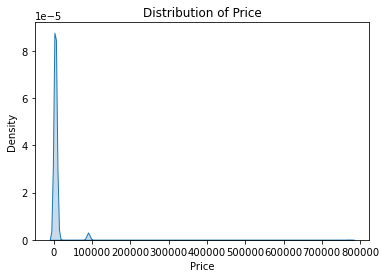

In [15]:
sns.kdeplot(data=df['Price'], shade=True)
plt.title('Distribution of Price')
plt.show()

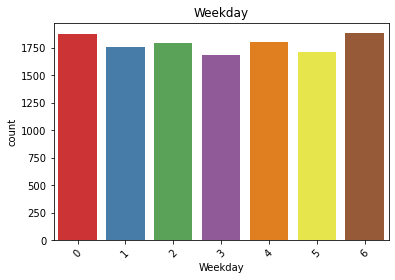

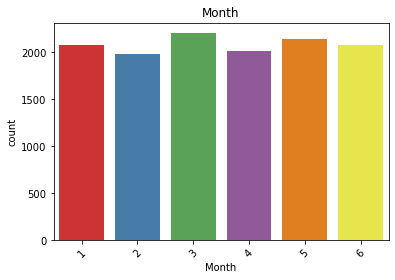

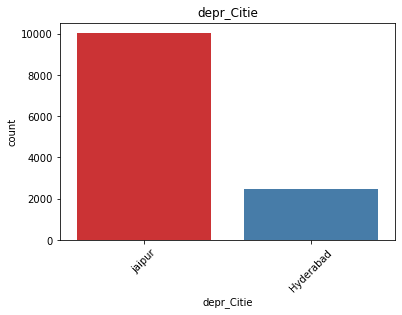

In [17]:
### Finding out the relationship between categorical features and Price ticket

cat_feats = ["Weekday","Month","depr_Citie"]

for feat in cat_feats:

    sns.countplot(x=feat,data=df,palette="Set1")

    #Rotate x-labels
    plt.xticks(rotation=45)   
    plt.xlabel(feat)
    plt.ylabel('count')
    plt.title(feat)
    plt.show()

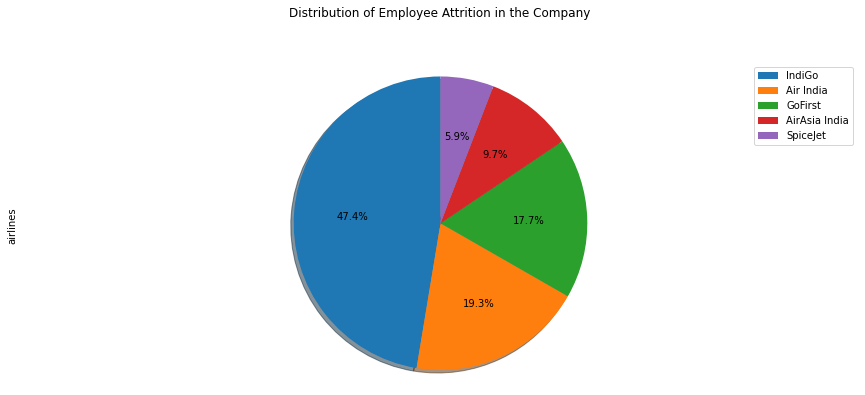

In [18]:
labels= df['airlines'].value_counts().index[0:5]
df['airlines'].astype(str).value_counts()[0:5].plot(kind='pie',
                                               figsize=(15,6),
                                               autopct='%1.1f%%',
                                               startangle=90,
                                               shadow=True,
                                               labels=None)
plt.title('Distribution of Employee Attrition in the Company',y=1.12)
plt.axis('equal')
# add Legend
plt.legend(labels=labels,loc='upper right')
#show plot
plt.show()

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

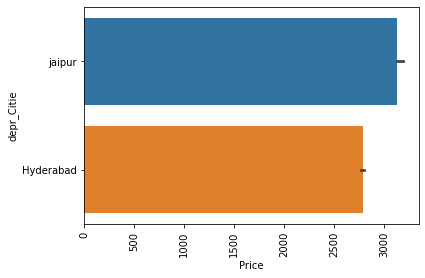

In [21]:
# Visualizing Relationship between Price & depr_Citie.

sns.barplot(x="Price", y="depr_Citie",data=df,estimator=np.median)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bengaluru'),
  Text(1, 0, 'chennai'),
  Text(2, 0, 'new delhi'),
  Text(3, 0, 'Jaipur'),
  Text(4, 0, 'mumbai')])

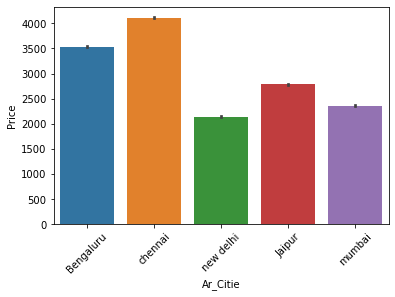

In [22]:
# Visualizing Relationship between Price & Ar_Citie.

sns.barplot(x="Ar_Citie", y="Price",data=df,estimator=np.median)
plt.xticks(rotation=45)

<AxesSubplot:>

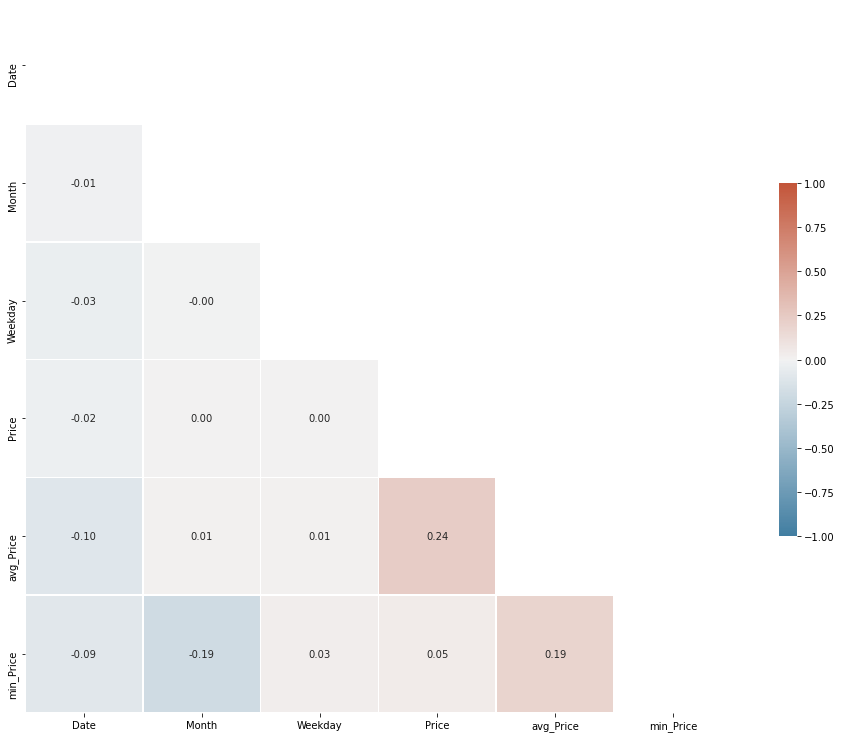

In [23]:
import seaborn as sns

corr = df.drop(labels=['Year'], axis= 1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(17, 13))
cmap = sns.diverging_palette(235, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=1.0, vmin=-1.0,
           square=True, linewidths=.5, annot=True, fmt='.2f', cbar_kws={'shrink': .5})

<AxesSubplot:>

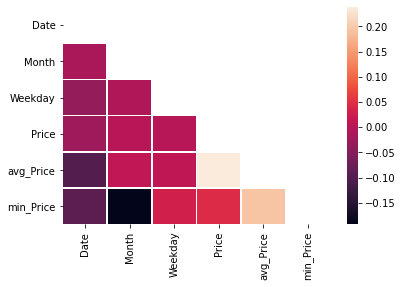

In [24]:
corr = df.drop(labels=['Year'], axis= 1).corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask,  linewidths = .5 )#, annot = True)

In [26]:
df.head()

,airlines,Date,Month,Year,Weekday,Dep_Time,Ar_Time,depr_Citie,Ar_Citie,Travel_Time,Airline_Cabin,no_stops,Price,timestamp,avg_Price,min_Price
0,IndiGo,1,1,2022,5,05:15,07:50,jaipur,Bengaluru,2h 35m,E,direct,7203,20211230-1158,7911.4,6203
1,IndiGo,1,1,2022,5,22:20,01:00,jaipur,Bengaluru,2h 40m,E,direct,7679,20211230-1158,7911.4,6203
2,IndiGo,1,1,2022,5,04:50,10:35,jaipur,Bengaluru,5h 45m,E,1 stop,7688,20211230-1158,7911.4,6203
3,IndiGo,1,1,2022,5,14:15,20:35,jaipur,Bengaluru,6h 20m,E,1 stop,7736,20211230-1158,7911.4,6203
4,IndiGo,1,1,2022,5,14:10,20:55,jaipur,Bengaluru,6h 45m,E,1 stop,7946,20211230-1158,7911.4,6203


In [31]:
dates = df['Date']
Months = df["Month"]
Year = df["Year"]

In [32]:
date_time = []
for d,m,y,t in zip(dates, Months, Year, depr_time):
    date_time.append(pd.to_datetime(str(y)+'-' +str(m)+'-' +str(d) ))

In [33]:
df["depr_date_time"] = date_time

In [34]:
df.head()

,airlines,Date,Month,Year,Weekday,Dep_Time,Ar_Time,depr_Citie,Ar_Citie,Travel_Time,Airline_Cabin,no_stops,Price,timestamp,avg_Price,min_Price,depr_date_time
0,IndiGo,1,1,2022,5,05:15,07:50,jaipur,Bengaluru,2h 35m,E,direct,7203,20211230-1158,7911.4,6203,2022-01-01
1,IndiGo,1,1,2022,5,22:20,01:00,jaipur,Bengaluru,2h 40m,E,direct,7679,20211230-1158,7911.4,6203,2022-01-01
2,IndiGo,1,1,2022,5,04:50,10:35,jaipur,Bengaluru,5h 45m,E,1 stop,7688,20211230-1158,7911.4,6203,2022-01-01
3,IndiGo,1,1,2022,5,14:15,20:35,jaipur,Bengaluru,6h 20m,E,1 stop,7736,20211230-1158,7911.4,6203,2022-01-01
4,IndiGo,1,1,2022,5,14:10,20:55,jaipur,Bengaluru,6h 45m,E,1 stop,7946,20211230-1158,7911.4,6203,2022-01-01


In [25]:
import gif# settings
plt.style.use("seaborn")
gif.options.matplotlib["dpi"] = 300

In [ ]:
@gif.frame
def helper_plot_1(df, i):
    df = df.copy()
    df.iloc[i:] = np.nan
    ax = df.plot(title="Tesla's stock price", legend=False, style="o--")
    ax.set_xlabel("")
    ax.set_ylabel("Price ($)")